# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/'

#### 3) 데이터 읽어오기

In [6]:
file1 = 'data1.pkl'

In [7]:
import joblib
data = joblib.load(path+file1)
data

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,...,-9.8,0.0,52.0,33.0,9.79,3,23.200000,1.0,17.2,924.000000
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,...,-8.9,0.0,63.0,28.0,9.07,4,20.200000,0.0,26.2,1881.500000
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,...,-9.2,0.0,73.0,37.0,8.66,5,22.200000,0.0,24.5,1759.000000
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,...,0.2,0.0,89.0,58.0,5.32,6,22.775000,0.0,26.2,1700.750000
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,...,-0.9,0.0,95.0,52.0,6.48,0,23.460000,0.0,23.6,2106.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,...,-7.3,0.0,86.0,51.0,10.25,1,42.771429,0.0,44.8,3807.000000
2921,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,...,-5.4,0.1,92.0,40.0,10.86,2,43.514286,0.0,52.5,3783.142857
2922,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,...,-7.8,0.0,71.0,34.0,10.88,3,42.957143,0.0,38.3,3716.142857
2923,2022-12-30,600,5293,4200,38.3,2183,8155,2022,12,52,...,-4.0,0.0,87.0,38.0,10.84,4,41.042857,0.0,33.7,3693.142857


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [8]:
data.isnull().sum()

Date               0
N_of_Cars          0
N_of_apply         0
N_of_rides         0
Waiting_T          0
Price              0
Distance           0
year               0
month              0
week               0
day                0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
day_of_week        0
Roll_Waiting_T     0
holiday            0
target             1
Roll_N_of_rides    0
dtype: int64

In [9]:
data = data.dropna()

### (2) 가변수화

In [39]:
data

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,...,-9.8,0.0,52.0,33.0,9.79,3,23.200000,1.0,17.2,924.000000
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,...,-8.9,0.0,63.0,28.0,9.07,4,20.200000,0.0,26.2,1881.500000
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,...,-9.2,0.0,73.0,37.0,8.66,5,22.200000,0.0,24.5,1759.000000
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,...,0.2,0.0,89.0,58.0,5.32,6,22.775000,0.0,26.2,1700.750000
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,...,-0.9,0.0,95.0,52.0,6.48,0,23.460000,0.0,23.6,2106.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,2022-12-26,603,5555,4605,39.2,2163,7889,2022,12,52,...,-7.9,0.0,85.0,46.0,8.27,0,43.485714,0.0,44.4,3855.285714
2920,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,...,-7.3,0.0,86.0,51.0,10.25,1,42.771429,0.0,44.8,3807.000000
2921,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,...,-5.4,0.1,92.0,40.0,10.86,2,43.514286,0.0,52.5,3783.142857
2922,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,...,-7.8,0.0,71.0,34.0,10.88,3,42.957143,0.0,38.3,3716.142857


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [13]:
train = data[data['Date']<'2022-10-01']
test = data[data['Date']>='2022-10-01']

#### 1) x, y 나누기

In [14]:
x = train.drop('target', axis=1)
y = train['target']
X_test = test.drop('target', axis=1)
y_test = test['target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y, test_size=91,shuffle=True, random_state=1 )
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2742, 21), (91, 21), (2742,), (91,))

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [18]:
X_train = X_train.drop('Date', axis=1)
X_val = X_val.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_val = scaler.transform(X_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

#### 1) 모델1

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=50, n_estimators=200, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
from sklearn.metrics import *
print(mean_absolute_error(y_val, y_pred))

5.195335164835169


#### 2) 모델2

In [23]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_val)
from sklearn.metrics import *
print(mean_absolute_error(y_val, y_pred))

4.7680856199410115


#### 3) 모델3

In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
from sklearn.metrics import *
print(mean_absolute_error(y_val, y_pred))

6.1549450549450535


### (2) 딥러닝

#### 1) 모델1

In [33]:
X_train.shape

(2742, 20)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

il = Input(shape=(20,))
hl = Dense(63, activation='relu')(il)
hl = Dropout(0.2)(hl)
hl = BatchNormalization()(hl)
hl = Dense(32, activation='relu')(hl)
hl = Dropout(0.2)(hl)
hl = BatchNormalization()(hl)
hl = Dense(16, activation='relu')(hl)
hl = Dropout(0.2)(hl)
hl = BatchNormalization()(hl)
ol = Dense(1, activation='linear')(hl)

model = tf.keras.models.Model(il, ol)

model.compile(loss='mean_absolute_error', optimizer='adam')

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es], batch_size=32)

Epoch 1/100
86/86 [==============================] - 5s 13ms/step - loss: 39.8741 - val_loss: 38.8530
Epoch 2/100
86/86 [==============================] - 1s 6ms/step - loss: 38.8967 - val_loss: 37.1814
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 37.3616 - val_loss: 35.0847
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 35.2382 - val_loss: 32.6394
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 32.5238 - val_loss: 29.6261
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 29.2323 - val_loss: 26.1296
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 25.3852 - val_loss: 20.8676
Epoch 8/100
86/86 [==============================] - 0s 5ms/step - loss: 21.0975 - val_loss: 18.7811
Epoch 9/100
86/86 [==============================] - 0s 2ms/step - loss: 16.6126 - val_loss: 15.2614
Epoch 10/100
86/86 [==============================] - 0s 5ms/step - loss: 12.5318 - val_lo

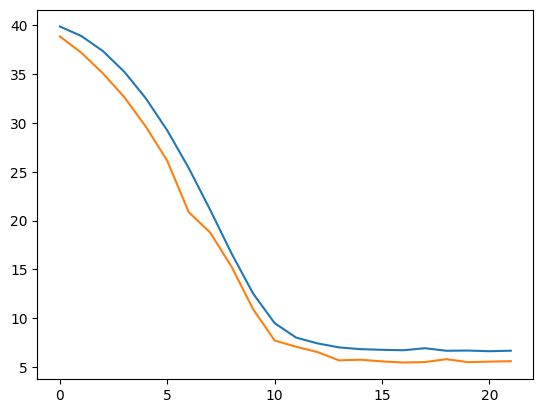

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

#### 2) 모델2

In [37]:
E_X_train = np.expand_dims(X_train, axis=2)
E_X_train.shape

(2742, 20, 1)

In [ ]:
E_X_val = np.expand_dims(X_val, axis=2)

In [38]:
import tensorflow as tf

# 입력층
input_layer = tf.keras.layers.Input(shape=(20, 1))

# 첫번째 convolutional layer
conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)

# 두번째 convolutional layer
conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)

# 세번째 convolutional layer
conv3 = tf.keras.layers.Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv3)

# 완전연결층
flatten = tf.keras.layers.Flatten()(pool3)
dense1 = tf.keras.layers.Dense(64, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(32, activation='relu')(dense1)

# 출력층
output_layer = tf.keras.layers.Dense(1)(dense2)

# 모델 구성 및 컴파일
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_absolute_error', optimizer='adam')

model.fit(E_X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])

Epoch 1/100
86/86 [==============================] - 2s 7ms/step - loss: 23.4825 - val_loss: 10.6850
Epoch 2/100
86/86 [==============================] - 0s 5ms/step - loss: 10.7379 - val_loss: 10.6496
Epoch 3/100
86/86 [==============================] - 0s 4ms/step - loss: 10.3498 - val_loss: 10.4871
Epoch 4/100
86/86 [==============================] - 0s 4ms/step - loss: 9.7287 - val_loss: 9.4234
Epoch 5/100
86/86 [==============================] - 0s 4ms/step - loss: 8.8053 - val_loss: 8.5961
Epoch 6/100
86/86 [==============================] - 0s 4ms/step - loss: 7.7729 - val_loss: 7.5537
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 6.8528 - val_loss: 7.0875
Epoch 8/100
86/86 [==============================] - 0s 4ms/step - loss: 6.7360 - val_loss: 6.7436
Epoch 9/100
86/86 [==============================] - 0s 4ms/step - loss: 6.5207 - val_loss: 7.3105
Epoch 10/100
86/86 [==============================] - 0s 4ms/step - loss: 6.3580 - val_loss: 6.5768
Epo

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.